<a href="https://colab.research.google.com/github/Haseeb-zai30/Ai-notebooks/blob/main/day_7_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

Regression is a statistical and machine learning technique used to find the **relationship between variables**.

It helps us understand how a dependent variable (output/target) changes when independent variables (inputs/features) change.

**Main purpose:** Prediction and explanation.

**Why Regression is Important?**

Prediction → Estimate future values (e.g., sales forecast).

Relationship → Understand how variables affect outcomes (e.g., effect of advertising on sales).

Decision-making → Helps in economics, engineering, business, AI, and sciences.

## Linear Regression

Linear regression is one of the simplest and most widely used statistical and machine learning methods.
It assumes that there is a linear (straight-line) relationship between:

Dependent variable (Y) → the target we want to predict

Independent variable(s) (X) → the input(s) used to predict Y

## Equation of Linear Regression

The mathematical model is:

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

Where:  

- $Y$ = Dependent variable (target/output)  
- $X$ = Independent variable (input)  
- $\beta_0$ = Intercept (value of $Y$ when $X = 0$)  
- $\beta_1$ = Slope (how much $Y$ changes when $X$ increases by 1)  
- $\epsilon$ = Error term (difference between predicted and actual values)  


## Assumptions of Linear Regression

For the model to be valid, certain conditions must hold:

Linearity → Relationship between X and Y must be linear.

Independence → Data points must be independent.

Homoscedasticity → Equal variance of errors (spread of residuals is constant).

Normality of Errors → Errors should follow a normal distribution.

No Multicollinearity (for multiple regression) → Independent variables shouldn’t be too highly correlated.

## Types of Linear Regression

1. **Simple Linear Regression** → One input variable ($X \rightarrow Y$).  

   $$
   Y = \beta_0 + \beta_1 X + \epsilon
   $$  

2. **Multiple Linear Regression** → Two or more input variables ($X_1, X_2, \dots, X_n$).  

   $$
   Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon
   $$


## Advantages

Easy to implement and interpret.

Works well for simple problems.

Foundation for advanced models.

## Limitations

Only works if relationship is linear.

Sensitive to outliers.

Assumptions must hold, otherwise predictions are unreliable.

Struggles with complex, nonlinear patterns

## Applications of Linear Regression

Predicting sales based on advertising spend

Predicting house prices based on size & location

Predicting student scores based on study hours

Predicting stock prices (basic trend analysis)

Predicting medical outcomes (e.g., effect of dosage on blood pressure)

**Linear Regression = Finding the best straight line that explains the relationship between input(s) and output.**

## Simple Linear Regression

Simple Linear Regression is the most basic regression technique.

It studies the relationship between one independent variable (X) and one dependent variable (Y).

The relationship is modeled using a straight line.

### Simple Linear Regression: Predicting CO₂ Emissions

### Step 1: Importing Libraries

In [1]:
import requests   # for downloading dataset from the internet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

requests → lets us download files directly from a URL.

numpy (np) → used for mathematical operations and arrays.

pandas (pd) → used for handling datasets in table format (rows & columns).

matplotlib.pyplot (plt) → used for creating plots and visualizations.

### Step 2: Downloading the Dataset

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

response = requests.get(url)       # send request to URL
file = "data.csv"                  # local filename
with open(file, "wb") as x:        # open in binary mode
    x.write(response.content)      # write file to computer


We fetch a CSV dataset (Fuel Consumption vs. CO₂ Emission).

requests.get(url) → downloads the file.

with open(..., "wb") → saves it as "data.csv" on your computer.

### Step 3: Loading the Data

In [3]:
df = pd.read_csv("data.csv")   # load dataset into a pandas DataFrame

print(df.head())       # show first 5 rows
print(df.describe())   # show summary statistics


   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

pd.read_csv() reads CSV into a DataFrame (like an Excel sheet).

df.head() → shows first 5 rows (quick peek at data).

df.describe() → gives statistics: mean, min, max, standard deviation, etc.

### Step 4: Selecting Useful Features

In [4]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
print(cdf.head(9))


   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267


We don’t need all columns. We only keep:

ENGINESIZE → size of engine (independent variable X).

CYLINDERS → number of cylinders in car engine.

FUELCONSUMPTION_COMB → combined fuel consumption.

CO2EMISSIONS → emissions we want to predict (dependent variable Y).

### Step 5: Splitting Data into Train & Test

In [5]:
msk = np.random.rand(len(df)) < 0.8   # 80% True, 20% False
train = cdf[msk]   # training set
test = cdf[~msk]   # testing set

We split data into training set (80%) and testing set (20%).

Training set → used to train the model.

Testing set → used to check accuracy on unseen data.

This prevents overfitting (memorizing instead of learning)

### Step 6: Training Linear Regression Model

In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()  # create regression model

train_x = np.asanyarray(train[["ENGINESIZE"]])  # input X
train_y = np.asanyarray(train[["CO2EMISSIONS"]])  # output Y

regr.fit(train_x, train_y)   # fit model to training data


LinearRegression()

We use **scikit-learn's** `LinearRegression()`.

- **Input (X)** = Engine size  
- **Output (Y)** = CO$_2$ Emissions  

The `fit()` method trains the model → it calculates the **best slope** and **intercept**.  

So the model learns the equation:

$$
y = m \cdot x + b
$$

Where:  

- $m$ = slope (coefficient)  
- $b$ = intercept (bias)  


### Step 7: Checking Model Parameters

In [7]:
print("Coefficients (slope): ", regr.coef_)
print("Intercept (bias): ", regr.intercept_)


Coefficients (slope):  [[38.94403907]]
Intercept (bias):  [125.36138005]


The coefficient tells how much emissions increase if engine size increases by 1 unit.

The intercept tells emissions when engine size = 0.

This gives us the line of best fit.

### Step 8: Visualizing Regression Line

Text(0, 0.5, 'Emission')

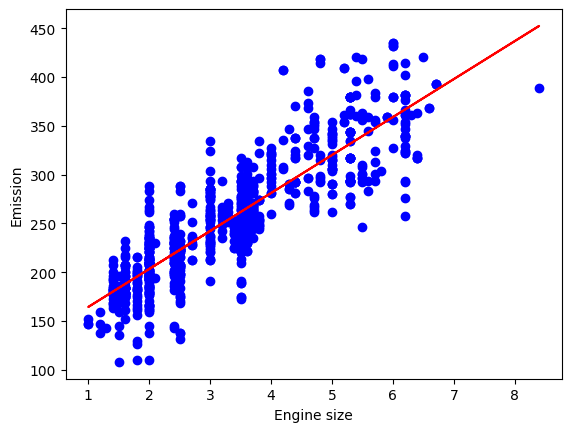

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")   # scatter plot
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "-r")   # regression line
plt.xlabel("Engine size")
plt.ylabel("Emission")
# plt.show()


Blue dots = actual data points.

Red line = predicted linear regression line.

If the line is close to points → model fits well

### Step 9: Model Evaluation

In [9]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_pred = regr.predict(test_x)   # predict using model

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_pred))


Mean absolute error: 22.98
Residual sum of squares (MSE): 864.67
R2-score: 0.80


We check how well our model predicts:

MAE (Mean Absolute Error) → average absolute error (small = better).

MSE (Mean Squared Error) → penalizes large errors (smaller = better).

R² Score → how much of the variance in data is explained by model (closer to 1 = better)

**Accuracy (R² = 0.80)**

The model explains 80% of the variation in CO₂ emissions using only engine size.

That’s quite good for a single-variable model.

**Error Level (MAE ≈ 23 g/km)**

On average, predictions are off by about 23 grams per km.

Considering emissions typically range 100–400 g/km, this is moderately small error.

**Outliers Effect (MSE = 864.67)**

Some predictions are off by a bigger margin (30–50 g/km).

Indicates that engine size alone cannot explain all cases.

**Model Simplicity**

Uses only one feature (engine size) → very simple and easy to interpret.

But simplicity limits accuracy — ignores other important factors like fuel type, weight, cylinders.

**Generalization**

Performs decently on test data → not overfitting.

Can generalize to unseen cars fairly well, but not perfectly.